In [270]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [272]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Majority Applicant get Approval for their Loan. Very Fews Application Rejected.

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [274]:
#Drop Unnecessary Column
df.drop('Loan_ID',axis=1,inplace=True)

In [275]:
df.shape

(614, 12)

In [276]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
print('Length of Missing Features',len(missing_features))
missing_features

Length of Missing Features 7


['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [277]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

Gender 2.1173 % missing values
Married 0.4886 % missing values
Dependents 2.443 % missing values
Self_Employed 5.2117 % missing values
LoanAmount 3.5831 % missing values
Loan_Amount_Term 2.2801 % missing values
Credit_History 8.1433 % missing values


Some Features are missing ,we will fill after Data Analyst.

In [278]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Length Of Categorical Features",len(categorical_features))
categorical_features

Length Of Categorical Features 7


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [279]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of Numeric Features',len(numeric_features))
numeric_features

Length Of Numeric Features 5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [280]:
continues_features=[features for features in numeric_features if len(df[features].unique())>25]
print("Length Of Continues_Features",len(continues_features))
continues_features

Length Of Continues_Features 3


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [281]:
discreat_features=[features for features in numeric_features if len(df[features].unique())<25]
print("Length Of Discreat_Features",len(discreat_features))
discreat_features

Length Of Discreat_Features 2


['Loan_Amount_Term', 'Credit_History']

# Visualization

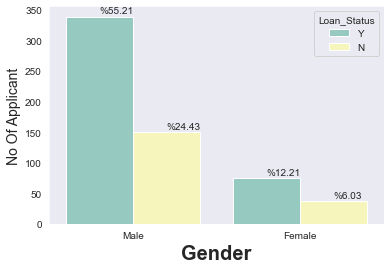

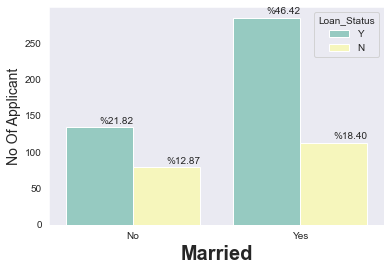

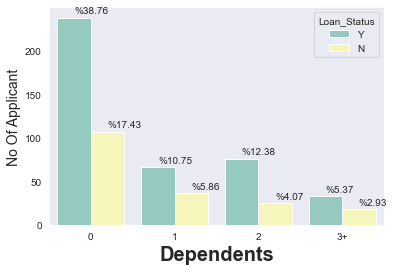

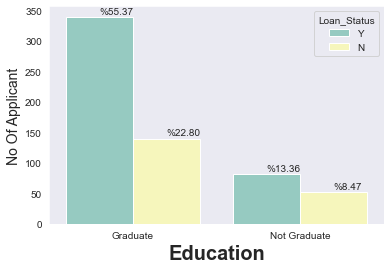

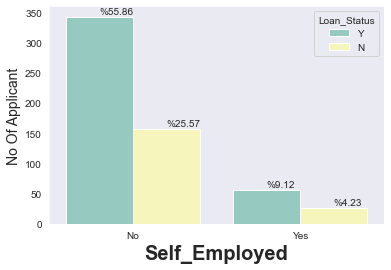

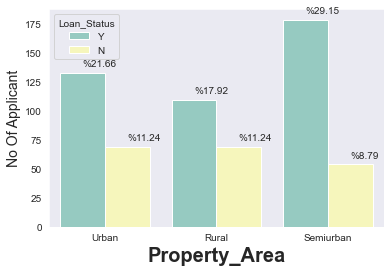

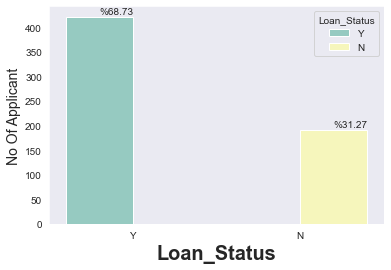

In [282]:
for i in categorical_features:
    plt.figure()
    ax=sns.countplot(df[i],hue='Loan_Status',data=df,palette='Set3')
    for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.2, p.get_height()+5))
        plt.xlabel(i,fontdict={'fontweight':'bold','fontsize':20})
        plt.ylabel('No Of Applicant',fontsize=14)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

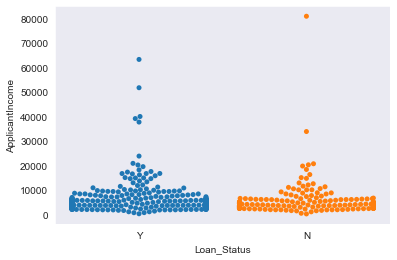

In [283]:
sns.swarmplot(y='ApplicantIncome',x='Loan_Status',data=df)

From this Chart we can say that for Income above 25000 Loan_Status is Yes majority but for Income below 20000 is can be yes or No.

Text(0.5, 1.0, 'Credit_History')

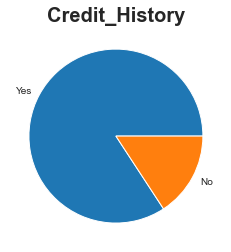

In [284]:
sns.set_style('dark')
plt.pie(x=df['Credit_History'].value_counts(),data=df,labels=['Yes','No'])
plt.title('Credit_History',fontdict={'fontweight':'bold','fontsize':20})

Text(0, 0.5, 'No of Loan Applicant')

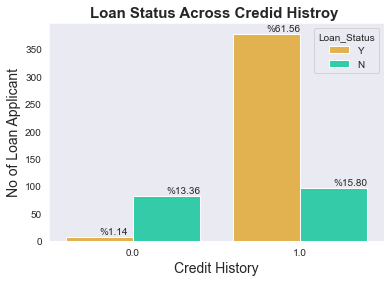

In [285]:
ax=sns.countplot(x=df['Credit_History'],hue='Loan_Status',data=df,palette='turbo_r')
plt.title('Loan Status Across Credid Histroy ',fontdict={'fontweight':'bold','fontsize':15})
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height()/614*100), (p.get_x()+0.2, p.get_height()+5))
plt.xlabel('Credit History',fontsize=14)
plt.ylabel('No of Loan Applicant',fontsize=14)

Majority Applicant Who having credit history are taking loan again. and their status is yes in majority.

For those wo dont have Credit History Their Application for Loan Is Rejected.

Loan_Status         N    Y
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             153  359
480.0               9    6


Text(0.5, 1.0, 'Loan Amount Term Vs Loan Status')

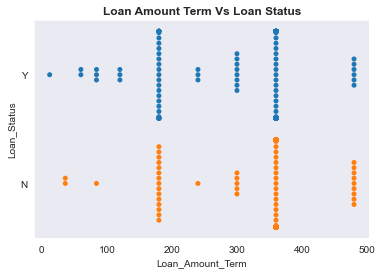

In [286]:
print(pd.crosstab(df['Loan_Amount_Term'],df['Loan_Status']))
sns.swarmplot(x='Loan_Amount_Term',y='Loan_Status',data=df)
plt.title("Loan Amount Term Vs Loan Status",fontdict={'fontweight':'bold'})

Text(0, 0.5, 'Loan Amount')

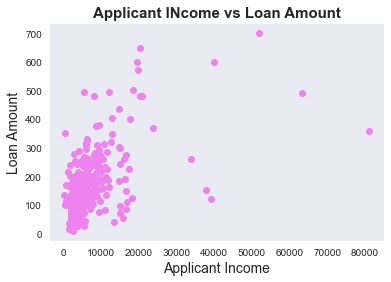

In [287]:
sns.set_style('dark')
plt.scatter(df['ApplicantIncome'],df['LoanAmount'],color='violet')
plt.title('Applicant INcome vs Loan Amount',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Applicant Income',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)

From Chart We can say that whose Income  is Below  200000 they are taking loan more than whose salary is high.

Text(0, 0.5, 'Loan Amount')

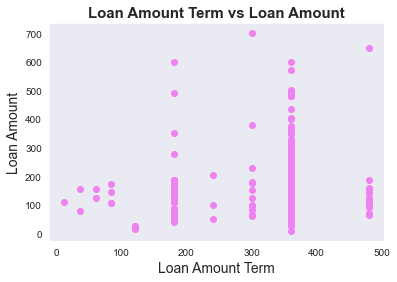

In [288]:
sns.set_style('dark')
plt.scatter(df['Loan_Amount_Term'],df['LoanAmount'],color='violet')
plt.title('Loan Amount Term vs Loan Amount',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Loan Amount Term',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)

Mojority Having Loan Amount Term is 360 months.

Very Few having Loan Amount Term is below 100 months.and their amount is also very low.

Text(0, 0.5, 'CoapplicantIncome')

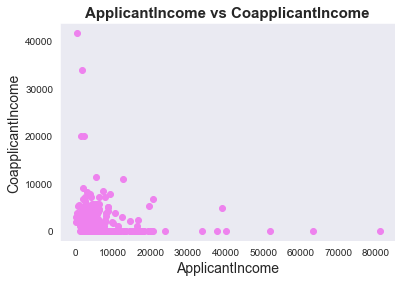

In [289]:
sns.set_style('dark')
plt.scatter(df['ApplicantIncome'],df['CoapplicantIncome'],color='violet')
plt.title('ApplicantIncome vs CoapplicantIncome',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('ApplicantIncome',fontsize=14)
plt.ylabel('CoapplicantIncome',fontsize=14)

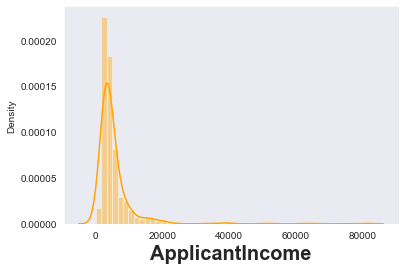

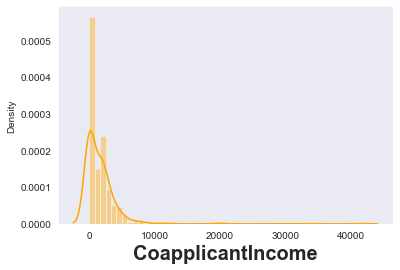

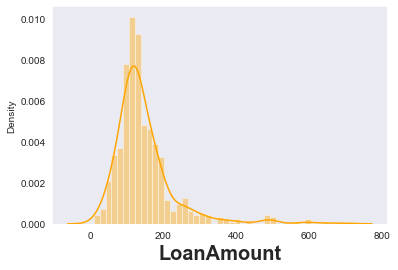

In [290]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='orange')
    plt.xlabel(i,fontdict={'fontweight':'bold','fontsize':20})

# Data Preprocessing

# Handling With Missing Values

In [300]:
missing_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [301]:
from sklearn.impute import SimpleImputer

In [302]:
imp=SimpleImputer(strategy='most_frequent')

In [303]:
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [304]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [305]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding

In [306]:
from sklearn.preprocessing import LabelEncoder

In [307]:
lb=LabelEncoder()

In [308]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

# STATASTICAL

In [309]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Text(0.5, 1.0, 'Co-Relation Chart')

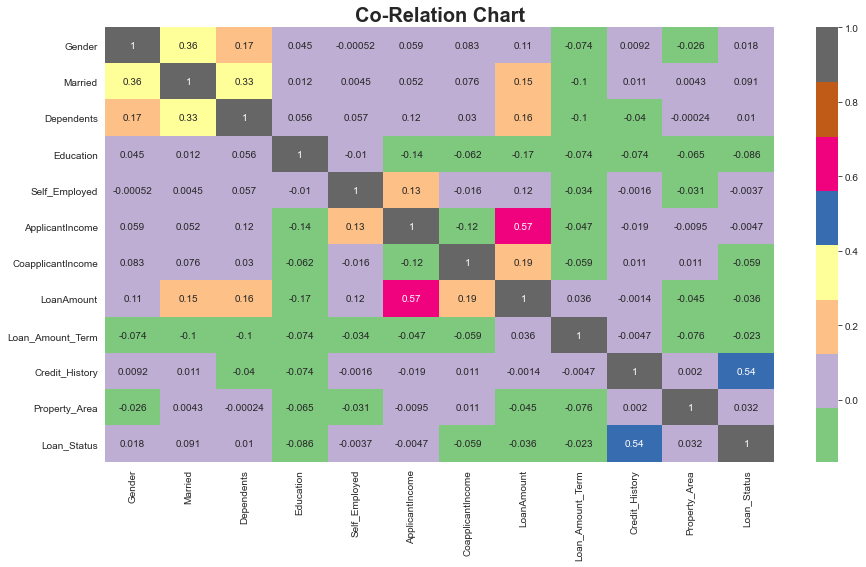

In [310]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,annot=True,cmap='Accent')
plt.title('Co-Relation Chart',fontdict={'fontweight':'bold','fontsize':20})

From This chart we can clearly see that LoanAmount is highly relation with ApplicantIncome 

Loan Status is highly relative with Credit_History.

# Data Cleaning

In [311]:
from scipy.stats import zscore

In [312]:
z=abs(zscore(df))

In [313]:
df_new=df[(z<3).all(axis=1)]

In [314]:
df.shape

(614, 12)

In [315]:
df_new.shape

(577, 12)

In [316]:
loss_of_data=(614-577)/614*100
loss_of_data

6.026058631921824

In [317]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [318]:
x=df.drop(['Loan_Status','CoapplicantIncome'],axis=1)
y=df['Loan_Status']

In [319]:
from sklearn.preprocessing import power_transform

In [320]:
#s=['CoapplicantIncome','LoanAmount']

In [321]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [322]:
x=x1
x.skew()

0   -1.648795
1   -0.644850
2    0.441404
3    1.367622
4    2.159796
5   -0.092946
6    0.024376
7    0.392571
8   -2.021971
9   -0.158267
dtype: float64

# StandardScaler

In [323]:
from sklearn.preprocessing import StandardScaler

In [324]:
std=StandardScaler()

In [325]:
X=std.fit_transform(x)

In [326]:
x=X

# SMOTE

In [327]:
from imblearn.over_sampling import SMOTE

In [328]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [329]:
trainy.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Random State Selection

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [331]:
lg=LogisticRegression()

In [332]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('At the random state=',i)
        print('Train Score:',accuracy_score(y_train,pred_train))
        print('Test Score',accuracy_score(y_test,pred_test))

At the random state= 64
Train Score: 0.7155555555555555
Test Score 0.7159763313609467


In [333]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=64)

In [334]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [335]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [336]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [337]:
fun(lg)

Accuracy Score 71.59763313609467
Confusion Matrix
 [[48 33]
 [15 73]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        81
           1       0.69      0.83      0.75        88

    accuracy                           0.72       169
   macro avg       0.73      0.71      0.71       169
weighted avg       0.72      0.72      0.71       169

F1 score 75.25773195876289


In [338]:
fun(svc)

Accuracy Score 73.96449704142012
Confusion Matrix
 [[45 36]
 [ 8 80]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.56      0.67        81
           1       0.69      0.91      0.78        88

    accuracy                           0.74       169
   macro avg       0.77      0.73      0.73       169
weighted avg       0.77      0.74      0.73       169

F1 score 78.43137254901961


In [339]:
fun(svcl)

Accuracy Score 71.00591715976331
Confusion Matrix
 [[33 48]
 [ 1 87]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.41      0.57        81
           1       0.64      0.99      0.78        88

    accuracy                           0.71       169
   macro avg       0.81      0.70      0.68       169
weighted avg       0.80      0.71      0.68       169

F1 score 78.02690582959642


In [340]:
fun(svcp)

Accuracy Score 72.18934911242604
Confusion Matrix
 [[44 37]
 [10 78]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        81
           1       0.68      0.89      0.77        88

    accuracy                           0.72       169
   macro avg       0.75      0.71      0.71       169
weighted avg       0.74      0.72      0.71       169

F1 score 76.84729064039408


In [341]:
fun(dtc)

Accuracy Score 75.7396449704142
Confusion Matrix
 [[64 17]
 [24 64]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        81
           1       0.79      0.73      0.76        88

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169

F1 score 75.7396449704142


In [342]:
fun(knn)

Accuracy Score 78.10650887573965
Confusion Matrix
 [[64 17]
 [20 68]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        81
           1       0.80      0.77      0.79        88

    accuracy                           0.78       169
   macro avg       0.78      0.78      0.78       169
weighted avg       0.78      0.78      0.78       169

F1 score 78.61271676300578


# Ensemble Method

In [343]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [344]:
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

In [345]:
fun(rfc)

Accuracy Score 84.61538461538461
Confusion Matrix
 [[66 15]
 [11 77]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.81      0.84        81
           1       0.84      0.88      0.86        88

    accuracy                           0.85       169
   macro avg       0.85      0.84      0.85       169
weighted avg       0.85      0.85      0.85       169

F1 score 85.55555555555556


In [346]:
fun(adc)

Accuracy Score 79.88165680473372
Confusion Matrix
 [[58 23]
 [11 77]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.72      0.77        81
           1       0.77      0.88      0.82        88

    accuracy                           0.80       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.80      0.80      0.80       169

F1 score 81.91489361702129


In [347]:
fun(gdc)

Accuracy Score 78.10650887573965
Confusion Matrix
 [[58 23]
 [14 74]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        81
           1       0.76      0.84      0.80        88

    accuracy                           0.78       169
   macro avg       0.78      0.78      0.78       169
weighted avg       0.78      0.78      0.78       169

F1 score 80.0


# Hyper Tuning For Best Score

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
p1={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2,3,4]}

In [240]:
gd=GridSearchCV(knn,p1)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [241]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=5,p=1,weights='uniform')
fun(knn1)

Accuracy Score 73.96449704142012
Confusion Matrix
 [[58 21]
 [23 67]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        79
           1       0.76      0.74      0.75        90

    accuracy                           0.74       169
   macro avg       0.74      0.74      0.74       169
weighted avg       0.74      0.74      0.74       169

F1 score 75.2808988764045


In [246]:
p2={'n_estimators':[10,50,75,100,250],'max_depth':[7,8,9,10,11,6],'max_features':['auto','log','sqrt'],'random_state':[11,25,36,58,100]}
gd1=GridSearchCV(rfc,p2)
gd1.fit(trainx,trainy)
print(gd1.best_params_)

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 250, 'random_state': 25}


In [247]:
rfc1=RandomForestClassifier(n_estimators=250,max_depth=11,max_features='auto',random_state=25)
fun(rfc1)

Accuracy Score 81.65680473372781
Confusion Matrix
 [[59 20]
 [11 79]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        79
           1       0.80      0.88      0.84        90

    accuracy                           0.82       169
   macro avg       0.82      0.81      0.81       169
weighted avg       0.82      0.82      0.82       169

F1 score 83.59788359788361


# Cross Validation

In [348]:
from sklearn.model_selection import cross_val_score

In [350]:
for i in range(2,16):
    score=cross_val_score(rfc1,x,y,cv=i)
    print("For the value of cv=",i,score.mean())

For the value of cv= 2 0.7931596091205212
For the value of cv= 3 0.7948190658377173
For the value of cv= 4 0.7948709786945081
For the value of cv= 5 0.7899107023857124
For the value of cv= 6 0.7980677707976392
For the value of cv= 7 0.8013696074040901
For the value of cv= 8 0.7997906698564593
For the value of cv= 9 0.8045846357866817
For the value of cv= 10 0.7982548915917504
For the value of cv= 11 0.799793388429752
For the value of cv= 12 0.8012506284565108
For the value of cv= 13 0.8062602291325697
For the value of cv= 14 0.8031183932346723
For the value of cv= 15 0.8013821138211382


CV=7 we get good score

# AUC ROC CURVE

In [352]:
from sklearn.metrics import roc_curve,roc_auc_score

In [353]:
y_pred_prob=rfc1.predict_proba(x_test)[:,1]

In [354]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [360]:
print('ROC Score',roc_auc_score(y_test,rfc1.predict(x_test)))

ROC Score 0.9387626262626263


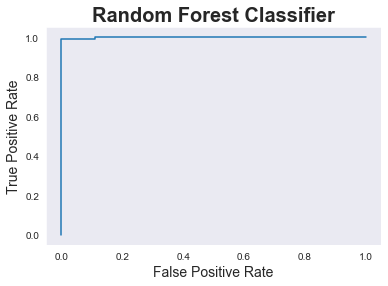

In [361]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Random Forest Classifier',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

# Model Saving On Basis Of Accuracy score & CV Score

In [362]:
import pickle
filename='Loan_Prediction.pkl'
pickle.dump(rfc1,open(filename,'wb'))

# Conclusion

In [363]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc1.predict(x_test)

print(res)

     Actual  Predict
497       1        1
79        1        1
728       0        0
697       0        0
784       0        0
..      ...      ...
758       0        1
535       1        1
478       1        1
704       0        1
732       0        0

[169 rows x 2 columns]
